# Importer Libraries et Données

In [1]:
# %reload_ext autoreload
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import os
import warnings
from os.path import join
from typing import Tuple

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import ceil
from PIL import Image
from PIL.ImageFilter import GaussianBlur
from random import sample, randint
from tqdm.notebook import tqdm
from yellowbrick.features import PCA as yb_PCA

import helper as hp

# switch off chain assignment warning
pd.options.mode.chained_assignment = None  # default='warn'
# disable maximum image pixel limit
Image.MAX_IMAGE_PIXELS = None

# suppress tight layout warnings
warnings.filterwarnings("ignore", message="Tight layout not applied.")

In [3]:
# import dataframe
df =  pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')
df.shape

(1050, 15)

In [4]:
df.sample(5)

uniq_id            crawl_timestamp  \
347  539f82930cfad8afef1a75882eb45703  2015-12-01 06:13:00 +0000   
302  26d8d458084ef90d395d303eaeb71587  2015-12-01 06:13:00 +0000   
539  052559ede419996737893eb47568ee7f  2016-01-07 05:50:25 +0000   
233  34d3b2b8d263294107a3ffc69b35ff8f  2015-12-01 12:40:44 +0000   
8    41384da51732c0b4df3de8f395714fbb  2015-12-04 07:25:36 +0000   

                                           product_url  \
347  http://www.flipkart.com/nivea-fresh-power-boos...   
302  http://www.flipkart.com/nihar-pirangi-bomber-s...   
539  http://www.flipkart.com/maxima-26512ppgn-fiber...   
233  http://www.flipkart.com/ethnic-story-royal-dur...   
8    http://www.flipkart.com/alfajr-wy16b-youth-dig...   

                                          product_name  \
347        Nivea Fresh Power Boost Deo Combo Combo Set   
302           Nihar Pirangi Bomber Showpiece  -  10 cm   
539  Maxima 26512PPGN FIBER COLLECTION Analog Watch...   
233  The Ethnic Story Royal Durban Showpiece  -  30...   
8    Alfajr WY16B Youth Digital Watch  - For Men, Boys   

                                 product_category_tree               pid  \
347  ["Beauty and Personal Care >> Fragrances >> De...  CAGDY9Q7HSNDHGFC   
302  ["Home Decor & Festive Needs >> Showpieces >> ...  SHIE8M9PWUF5H4SF   
539  ["Watches >> Wrist Watches >> Maxima Wrist Wat...  WATDJTR9HKKRXKTJ   
233  ["Home Decor & Festive Needs >> Showpieces >> ...  SHIE8Q7P5XAGDZ4H   
8    ["Watches >> Wrist Watches >> Alfajr Wrist Wat...  WATECHFU4QGFQEJG   

     retail_price  discounted_price                                 image  \
347         570.0             570.0  539f82930cfad8afef1a75882eb45703.jpg   
302         799.0             194.0  26d8d458084ef90d395d303eaeb71587.jpg   
539         595.0             595.0  052559ede419996737893eb47568ee7f.jpg   
233        3700.0            1850.0  34d3b2b8d263294107a3ffc69b35ff8f.jpg   
8          5495.0            4995.0  41384da51732c0b4df3de8f395714fbb.jpg   

     is_FK_Advantage_product  \
347                    False   
302                    False   
539                     True   
233                    False   
8                      False   

                                           description       product_rating  \
347  Flipkart.com: Buy Nivea Fresh Power Boost Deo ...  No rating available   
302  Buy Nihar Pirangi Bomber Showpiece  -  10 cm f...                    5   
539  Maxima 26512PPGN FIBER COLLECTION Analog Watch...                    5   
233  Buy The Ethnic Story Royal Durban Showpiece  -...  No rating available   
8    Alfajr WY16B Youth Digital Watch  - For Men, B...  No rating available   

          overall_rating             brand  \
347  No rating available               NaN   
302                    5             Nihar   
539                    5               NaN   
233  No rating available  The Ethnic Story   
8    No rating available               NaN   

                                product_specifications  
347  {"product_specification"=>[{"key"=>"Number of ...  
302  {"product_specification"=>[{"key"=>"Brand", "v...  
539  {"product_specification"=>[{"key"=>"Type", "va...  
233  {"product_specification"=>[{"key"=>"Brand", "v...  
8    {"product_specification"=>[{"key"=>"Chronograp...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

# Nettoyage de Données - DataFrame

In [6]:
# check number of null values
df.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

**Remarque**<br>
Comme on n'a  pas besoins  de 'retail_price' et 'discounted_price' pour NLP et la partie image, on peut les garder ainsi.

## Imputer les Valueurs Manquantes

In [4]:
# impute null values in 'brand' with the value 'missing'
df.brand[df.brand.isnull()] = 'missing'

In [10]:
# df.to_csv("data/df_clean.csv", index=False)

# Fonctions d'Outils

In [5]:
def reduce_by_ratio(img: Image, min_pixel: int = 100):
    """
    Reduce image size by respecting its width and height ratio.
    then show the resized image.

    Parameters
    ----------
    img : Image (of PIL)
        the image to be resized
    min_pixel : int, optional (default is 100)
        the number of pixels to be set for the smaller side
        (i.e., width or height) of the image
        e.g. given default min_pixel is 100, if the width of an image is
        smaller than its height, then the width of the image will be set to 100
        while the height of the image will be calculated according to the
        size ratio of the original image, and vice versa.

    """

    width, height = img.size
    if width <= height:
        height = int(height / width * min_pixel)
        width = min_pixel
    else:
        width = int(width / height * min_pixel)
        height = min_pixel
    img = img.resize((width, height))
    img.show()


def resize_by_h(img: Image, h_pixel: int = 200) -> Image:
    """
    Reduce image size by setting the height to the value of h_pixel
    while respecting its width and height ratio.

    Parameters
    ----------
    img : Image (of PIL)
        the image to be resized
    h_pixel : int, optional (default is 200)
        the number of pixels to be set for the height of the image

    Returns
    -------
    Image (of PIL)
        resized image

    """

    weight, height = img.size
    weight = int(weight / height * h_pixel)
    height = h_pixel
    return img.resize((weight, height))


def draw_keypoints(path: str, keypoint: list, h_pixel: int = 200) -> Image:
    """
    Draw detected keypionts on image.

    Parameters
    ----------
    path : str
        file path of the image
    keypoints : list
        a list of keypoints of the image
    h_pixel : int, optional (default is 200)
        the number of pixels to be set for the height of the image

    Returns
    -------
    Image (of PIL)
        resized image with keypoints drawn on top of it

    """

    img = cv2.drawKeypoints(
        cv2.imread(path),
        keypoint,
        None,
        flags=0,
    )
    return resize_by_h(Image.fromarray(img), h_pixel)


def collage(
    root: str,
    images: pd.Series,
    n_img: int = 9,
    h_pixel: int = 200,
    draw_keypoint: bool = False,
    keypoints: list = None,
):
    """
    Draw detected keypionts on image.

    Parameters
    ----------
    root : str
        root path of the images folder
    images: pd.Series
        images' filenames stored in a pandas series
    n_img: int (default is 9)
        number of images to be plotted in the collage
    h_pixel : int, optional (default is 200)
        the number of pixels to be set for the height of the image
    draw_keypoint: bool (default is False)
        if True and 'keypoints' not None, keypoints will be drawn on the images
        with the keypoints provided
    keypoints : list (default is None)
        a list of keypoints of the image. Cannot be None if 'draw_keypoint' is True

    """
    cnt = 1
    cnt_lib = 0
    collage = {}
    # grid size is the squre root  value of the number of images to be displayed in the collage
    grid_size = ceil(np.sqrt(n_img))
    # get a list of random index. The length of the list is equal to the number
    # of images to be put in the collage
    indices = sample(range(0, 1048), n_img)
    if draw_keypoint & (keypoints == None):
        print(
            "'keypoints' cannot be None if 'draw_keypoint' is True. Please provide a nested list of keypoints"
        )

    for idx, img_idx in enumerate(indices):
        #  get first image of every row
        if idx % (grid_size) == 0:
            if draw_keypoint:
                # draw keypoints and resize image
                img_0 = draw_keypoints(
                    join(root, images[img_idx]), keypoints[img_idx], h_pixel
                )
            else:
                # resize image
                img_0 = resize_by_h(Image.open(join(root, images[img_idx])), h_pixel)
            continue
        else:
            if draw_keypoint:
                # draw keypoints and resize image
                img = draw_keypoints(
                    join(root, images[img_idx]), keypoints[img_idx], h_pixel
                )
            else:
                # resize image
                img = resize_by_h(Image.open(join(root, images[img_idx])), h_pixel)
            if cnt == 1:
                # stack first 2 images of a row
                collage[cnt_lib] = np.hstack((np.array(img_0), np.array(img)))
            else:
                # stack following images of a row
                collage[cnt_lib] = np.hstack((collage[cnt_lib], np.array(img)))
            cnt += 1
            # go to the next row if the number of images reaches the grid size
            if cnt == grid_size:
                cnt_lib += 1
                cnt = 1
    # display images of every row of the grid
    for value in collage.values():
        img_collage = Image.fromarray(value)
        img_collage.show()


def plot_img_hist(
    root: str,
    n_img: int,
    n_cols: int,
    images: pd.Series,
    random: bool = True,
    indices: list = None,
    figsize: tuple = (20, 20),
):
    """
    Plot image histogram.

    Parameters
    ----------
    root : str
        root path of the images folder
    n_img: int (default is 9)
        number of images to be plotted in the collage
    n_cols: int
        number of columns of histograms to be plotted
    images: pd.Series
        images' filenames stored in a pandas series
    random : bool, optional (default is True)
        whether or not to generate a list of random index
        if 'random' is False, 'indices' cannot be None
    indices: list (default is None)
        a list of image indices. Cannot be None if 'random' is True
    figsize: tuple (default is (20, 20))
        figure size if histograms

    """
    plt.figure(figsize=figsize)

    # generate a list of random image indices
    if random == True:
        indices = sample(range(0, 1048), n_img)
    elif random == False and indices == None:
        print(
            "If 'random' is False, 'indices' cannot be None. . Please provide a list of image indices"
        )

    for idx, img_idx in enumerate(indices):
        # plot subplot
        plt.subplot(int(len(indices) / n_cols) + 1, n_cols, idx + 1)
        # get image
        img = np.array(Image.open(join(root, images[img_idx])))
        # plot histogram
        plt.hist(img.flatten(), bins=range(256))
        # print image index as histogram title
        plt.title(img_idx)
    plt.show()


def compare_hist(img: Image, blur: bool = False, equalize: bool = False):
    """
    Compare image histogram (before and after transformation).

    Parameters
    ----------
    img : Image (of PIL)
        the image to be compared
    blur : bool, optional (default is False)
        whether or not to blur the image
    equalize : bool, optional (default is False)
        whether or not to equalize the image

    """
    plt.figure(figsize=(20, 5))
    # plot histogram of the original image before transformation
    plt.subplot(1, 2, 1)
    mat_flat = np.array(img).flatten()
    plt.hist(mat_flat, bins=range(256))
    # plot historgram of the transformed image
    plt.subplot(1, 2, 2)
    # equlize image
    if equalize:
        mat_flat_cleaned = cv2.equalizeHist(mat_flat)
    # blur image (to reduce noise)
    elif blur:
        mat_flat_cleaned = np.array(img.filter(GaussianBlur())).flatten()
    plt.hist(mat_flat_cleaned, bins=range(256))
    plt.show()


def compare_images(
    img: Image,
    img_2: Image = None,
    blur: bool = False,
    equalize: bool = False,
    h_pixel: int = 200,
):
    """
    Compare images (before and after transformation).

    Parameters
    ----------
    img : Image (of PIL)
        the original image to be compared
    img_2 : Image (of PIL)
        the second image (transformed or not) to be compared (default is None)
    blur : bool, optional (default is False)
        whether or not to blur the image
    equalize : bool, optional (default is False)
        whether or not to equalize the image

    """
    # reize image
    img_xs = resize_by_h(img)
    # equlize and reisze image
    if equalize:
        mat_flat_eq = cv2.equalizeHist(np.array(img).flatten())
        img_2_xs = resize_by_h(
            Image.fromarray(mat_flat_eq.reshape(np.array(img).shape))
        )
    # blur and reisze image
    elif blur:
        img_2_xs = resize_by_h(img.filter(GaussianBlur()))
    # reisze the second image to be compared
    elif img_2:
        img_2_xs = resize_by_h(img_2)
    # stack the images together
    arr_double = np.hstack((np.array(img_xs), np.array(img_2_xs)))
    # display the stacked images
    Image.fromarray(arr_double).show()


def preprocess_img(
    root: str,
    root_preprocessed: str,
    images: pd.Series,
    blur: bool = False,
    equalize: bool = False,
):
    """
    Draw detected keypionts on image.

    Parameters
    ----------
    root : str
        root path of the images folder
    root_preprocessed : str
        folder root path to store the preprocessed images
    blur : bool, optional (default is False)
        whether or not to blur the image
    equalize : bool, optional (default is False)
        whether or not to equalize the image

    """
    for filename in tqdm(images, desc="Preprocess Progress Bar"):
        # read image
        img = Image.open(join(root, filename))

        # reduce image noise
        if blur and not equalize:
            arr_preprocessed = np.array(img.filter(GaussianBlur()))

        # equalize image
        elif equalize and not blur:
            mat = np.array(img).flatten()
            arr_preprocessed = cv2.equalizeHist(mat).reshape(np.array(img).shape)

        # Reduce image noise AND equalize image
        elif blur and equalize:
            mat_preprocessed = np.array(img.filter(GaussianBlur())).flatten()
            arr_preprocessed = cv2.equalizeHist(mat_preprocessed).reshape(
                np.array(img).shape
            )

        # save preprocessed image
        # create root folder is not yet exist
        if not os.path.exists(root_preprocessed):
            os.makedirs(root_preprocessed)

        # save image
        cv2.imwrite(
            join(root_preprocessed, filename),
            cv2.cvtColor(
                cv2.resize(arr_preprocessed, dsize=(128, 128)),  # redimension
                cv2.COLOR_RGB2GRAY,  # change to grayscale
            ),
        )


def combine_descriptors(descriptors: list) -> Tuple[int, np.array]:
    """
    Put all the descriptors together in one big array

    Parameters
    ----------
    descriptors: list
        a list of descriptor to be combined

    Returns
    -------
    int
        max feature numbers among all the images
    np.array
        the combined descriptors

    """
    # find maximum number of features in the dataset
    n_features_max = max(descriptor.shape[0] for descriptor in descriptors_sift)

    # make sure the number of features in each image is the same
    # by adding 0 --> black pxiels
    descriptors_list = []
    for descriptor in descriptors_sift:
        descriptor = descriptor.reshape(1, -1)

        if descriptor.shape[0] <= n_features_max * 128:
            descriptors_list.append(
                np.hstack(
                    (
                        descriptor.reshape(1, -1),
                        np.zeros(n_features_max * 128 - descriptor.shape[1]).reshape(
                            1, -1
                        ),
                    )
                )
            )
        else:
            descriptors_list.append(descriptor)

    # stack features
    descriptors = np.vstack(descriptors_list)
    return n_features_max, descriptors


def extract_features(
    extractor: str, fileroot: str, filepaths: pd.Series
) -> Tuple[list, list]:
    """
    Extract features from images using either ORB, SURF or SIFT algorithm

    Parameters
    ----------
    extractor: str
        features extraction algorithm to be used.
        available alforithms are 'orb', 'surf' and 'sift'.
    fileroot: str
        file root of the image files
    filepaths: pd.Series
        file paths of the image files

    Returns
    -------
    list
        a list of keypoints extracted from the images
    list
        a list of descriptors extracted from the images
    """

    # declare variables:
    keypoints = []
    descriptors = []

    # instantiate features extractor
    if extractor == "orb":
        feat_extract = cv2.ORB_create()
    elif extractor == "surf":
        feat_extract = cv2.xfeatures2d.SURF_create()
    elif extractor == "sift":
        feat_extract = cv2.xfeatures2d.SIFT_create()
    else:
        print(f"{extractor} is not a valide features extractor.")
        print("Valid features extractors are 'orb', 'surf' and 'sift'.")

    for filename in filepaths:
        # find key points and descriptors
        keypoint, descriptor = feat_extract.detectAndCompute(
            cv2.imread(join(fileroot, filename)), None
        )
        keypoints.append(keypoint)
        descriptors.append(descriptor)

    return keypoints, descriptors

# Nettoyage de Données - Images

In [5]:
root = "data/images/"

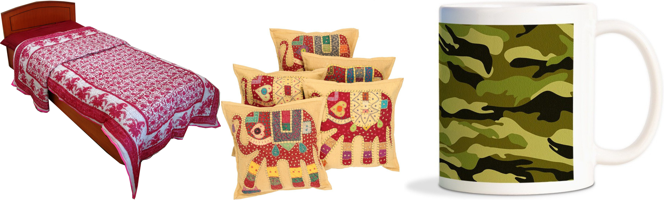

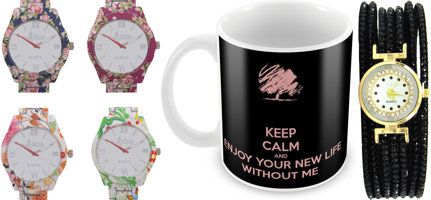

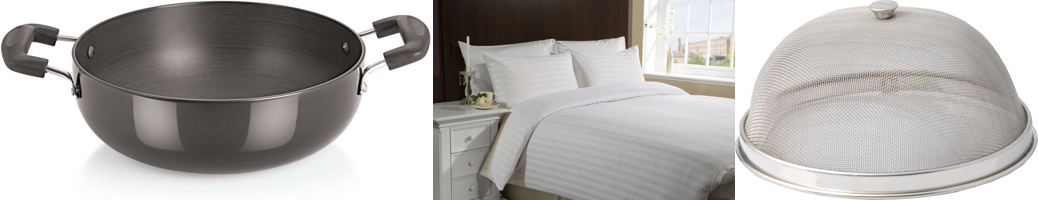

In [15]:
collage(root, df.image)

## Egalisation

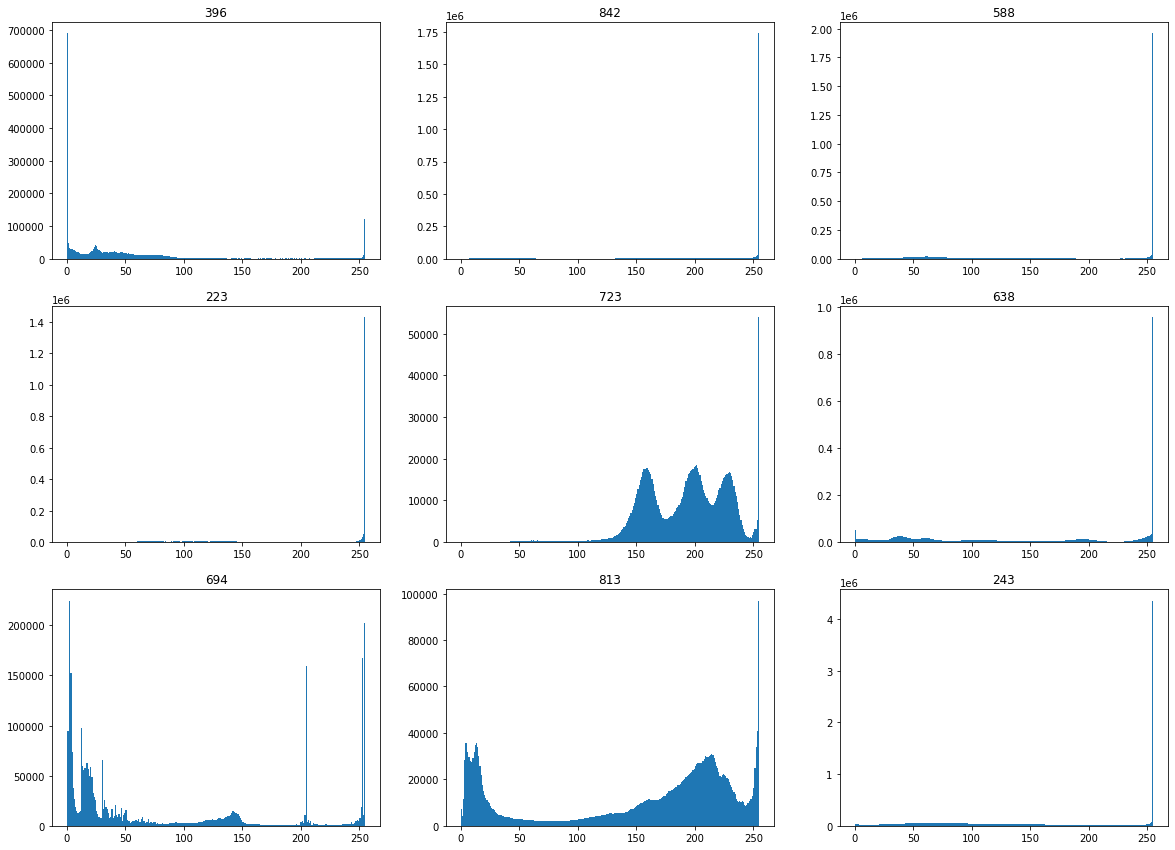

CPU times: user 6.21 s, sys: 84.8 ms, total: 6.3 s
Wall time: 6.35 s


In [14]:
%%time
plot_img_hist(root, 9, 3, df.image)

In [20]:
img = Image.open(join(root, df.image[generate_random_idx()]))

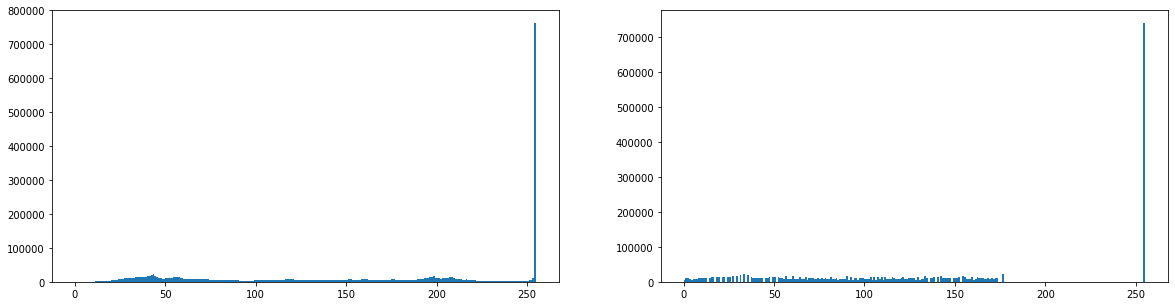

In [21]:
compare_hist(img, equalize=True)

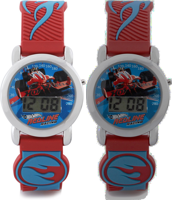

In [22]:
compare_images(img, equalize=True)

## Elimination du bruit

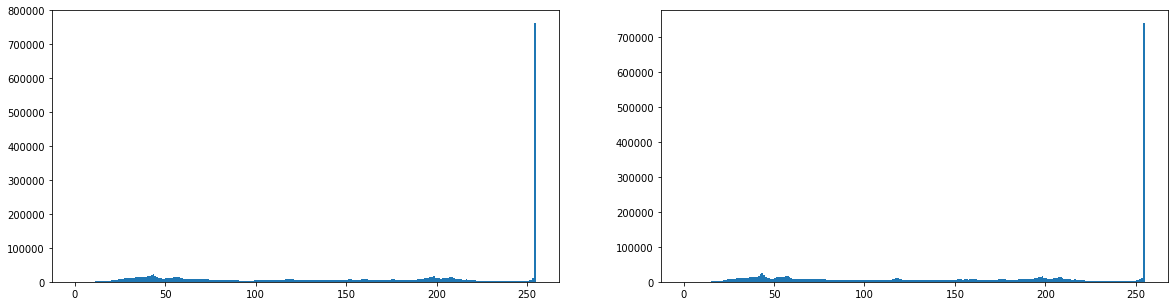

In [23]:
compare_hist(img, blur=True)

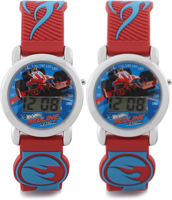

In [24]:
compare_images(img, img.filter(GaussianBlur()))

## Nettoyage de Toutes les Images

In [19]:
root_preprocessed = "data/images_preprocessed"

In [17]:
root_preprocessed_gray = 'data/images_preprocessed_gray'

In [70]:
preprocess_img(root, root_preprocessed_gray, df.image, equalize=True, blur=True)

Widget Javascript not detected.  It may not be installed or enabled properly.


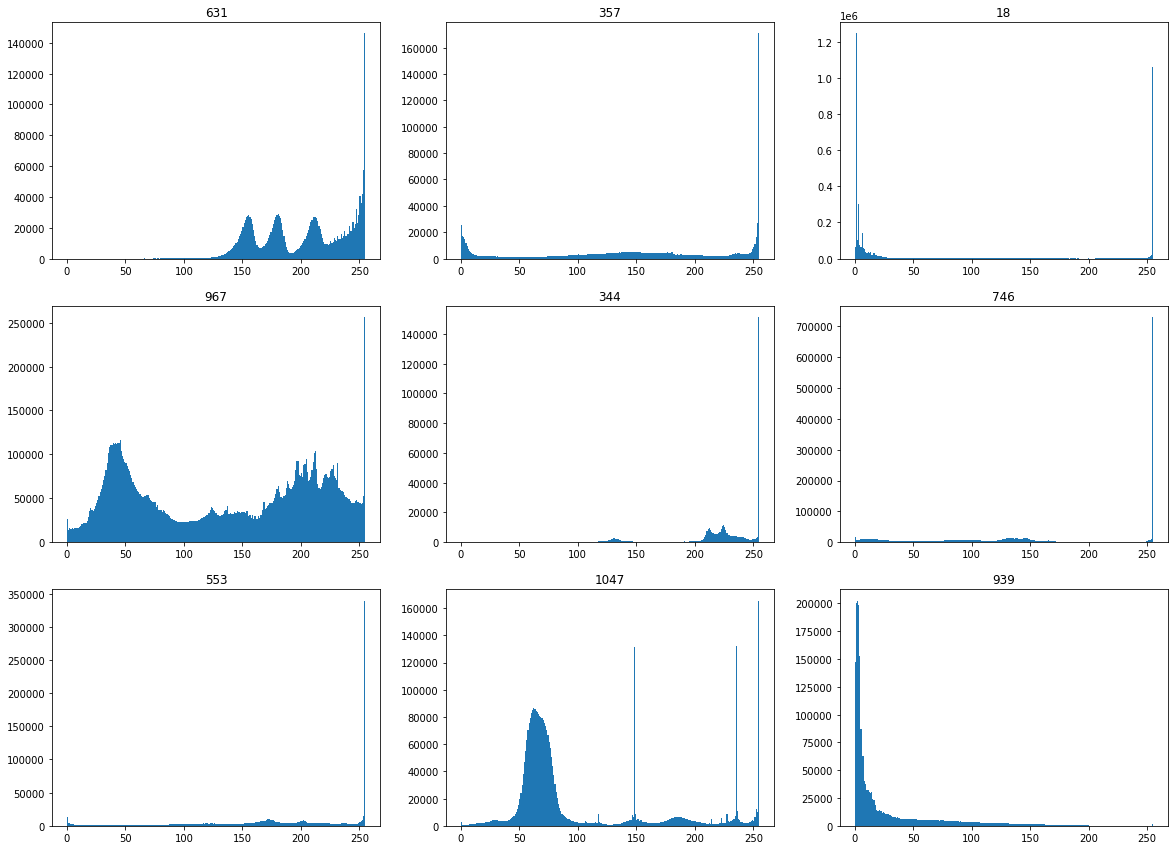

CPU times: user 6.14 s, sys: 0 ns, total: 6.14 s
Wall time: 6.17 s


In [48]:
%%time
n_img = 9
indices = sample(range(0, 1048), n_img)
plot_img_hist(root, n_img, 3, df.image, random=False, indices=indices)

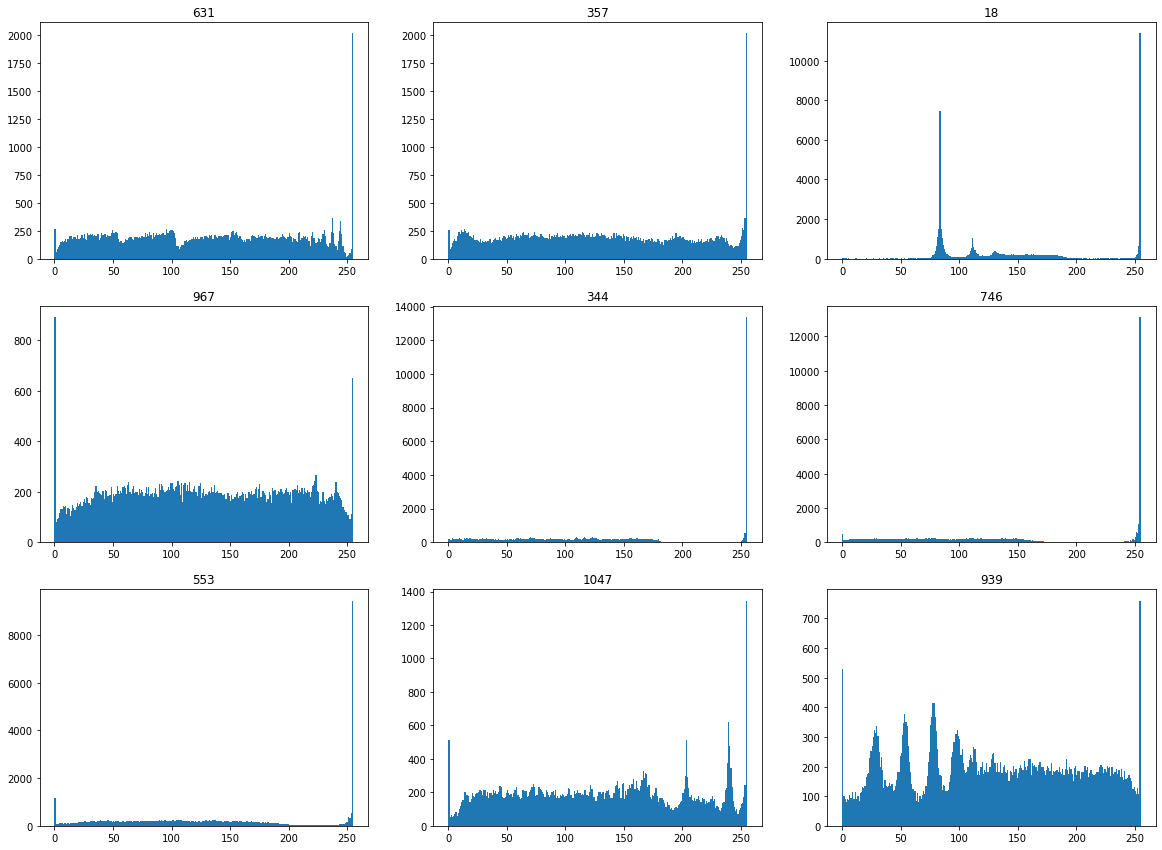

CPU times: user 5.29 s, sys: 0 ns, total: 5.29 s
Wall time: 5.31 s


In [49]:
%%time
plot_img_hist(root_preprocessed, n_img, 3, df.image, random=False, indices=indices)

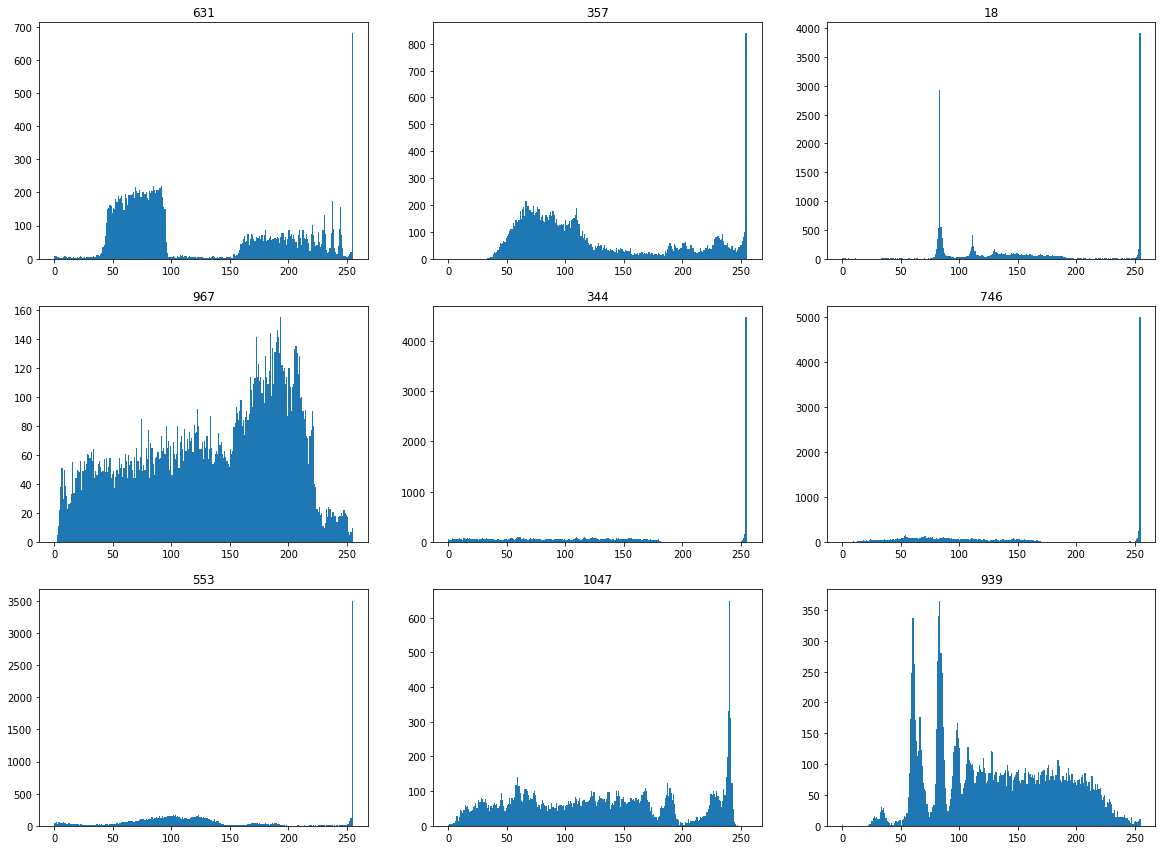

CPU times: user 5.19 s, sys: 0 ns, total: 5.19 s
Wall time: 5.24 s


In [50]:
%%time
plot_img_hist(root_preprocessed_gray, n_img, 3, df.image, random=False, indices=indices)

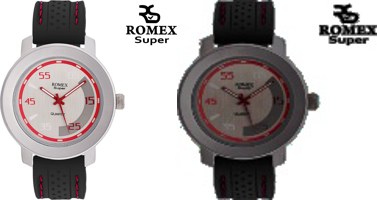

In [57]:
filename = df.image[651]
compare_images(
    Image.open(join(root, filename)), Image.open(join(root_preprocessed, filename))
)

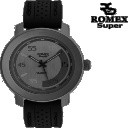

In [58]:
Image.open(join(root_preprocessed_gray, filename)).show()

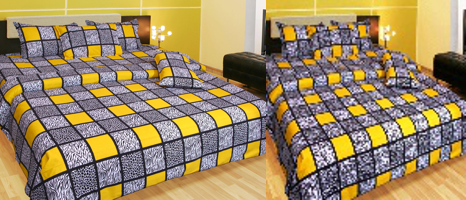

In [59]:
filename = df.image[967]
compare_images(
    Image.open(join(root, filename)), Image.open(join(root_preprocessed, filename))
)

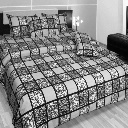

In [60]:
Image.open(join(root_preprocessed_gray, filename)).show()

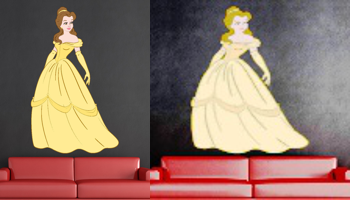

In [61]:
filename = df.image[1047]
compare_images(
    Image.open(join(root, filename)), Image.open(join(root_preprocessed, filename))
)

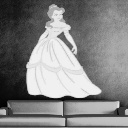

In [62]:
Image.open(join(root_preprocessed_gray, filename)).show()

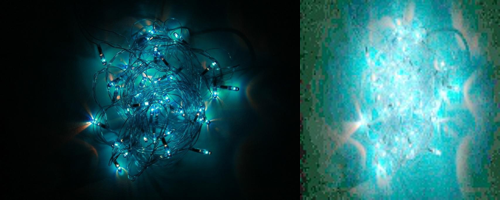

In [75]:
filename = df.image[939]
compare_images(
    Image.open(join(root, filename)), Image.open(join(root_preprocessed, filename))
)

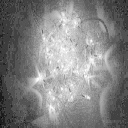

In [64]:
Image.open(join(root_preprocessed_gray, filename)).show()

# Extraction des Charactéristiques

## ORB

In [89]:
%%time
# create ORB key points and descriptors
keypoints_orb, descriptors_orb = extract_features(
    "orb", root_preprocessed_gray, df.image
)

CPU times: user 2.06 s, sys: 232 ms, total: 2.29 s
Wall time: 5.01 s


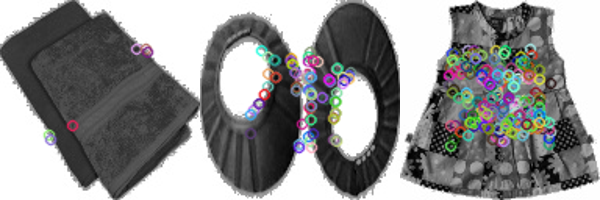

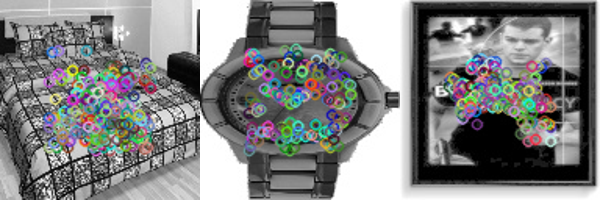

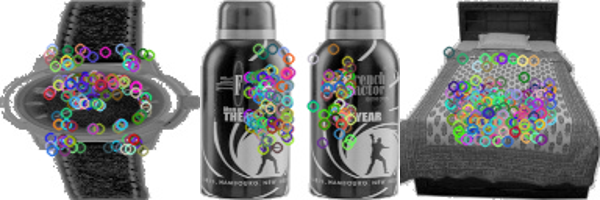

In [65]:
# display key points
collage(
    root_preprocessed_gray,
    df.image,
    draw_keypoint=True,
    keypoints=keypoints_orb,
)

## SUFT

In [85]:
%%time
# create SURF key points and descriptors
keypoints_surf, descriptors_surf = extract_features(
    "surf", root_preprocessed_gray, df.image
)

CPU times: user 36.6 s, sys: 7.59 s, total: 44.2 s
Wall time: 11.1 s


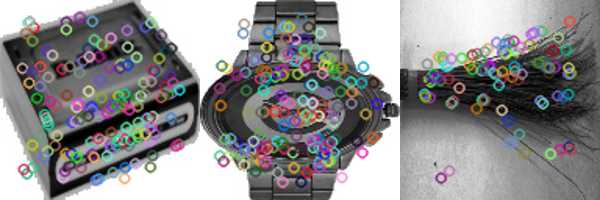

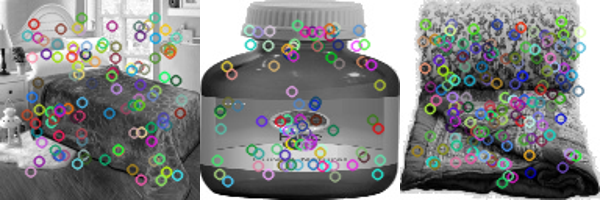

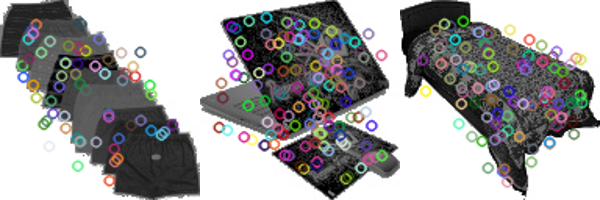

In [20]:
# display key points
collage(
    root_preprocessed_gray,
    df.image,
    draw_keypoint=True,
    keypoints=keypoints_suft,
)

## SIFT

In [6]:
%%time
# create sift key points and descriptors
keypoints_sift, descriptors_sift = extract_features(
    "sift", root_preprocessed_gray, df.image
)

CPU times: user 23.9 s, sys: 6.55 s, total: 30.4 s
Wall time: 9.97 s


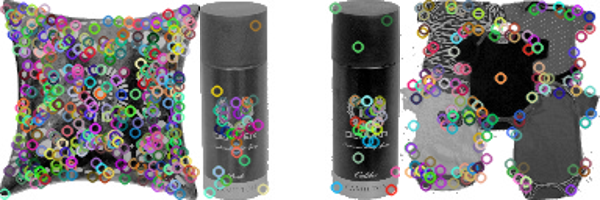

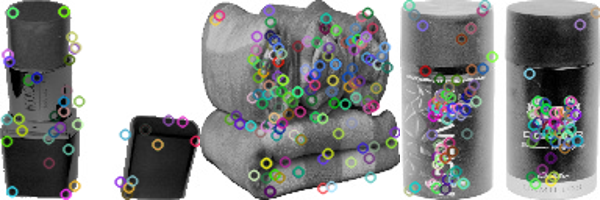

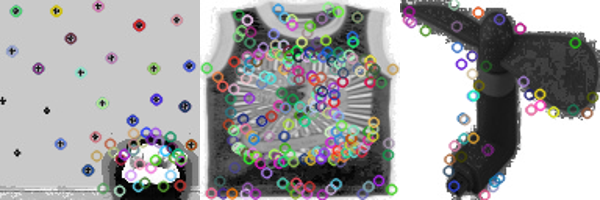

In [25]:
# display key points
collage(
    root_preprocessed_gray,
    df.image,
    draw_keypoint=True,
    keypoints=keypoints_sift,
)

**Remarque**<br>
SIFT donne un meilleur résultat que ORB.

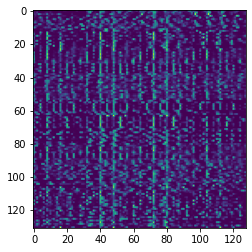

In [65]:
# display descriptors
plt.imshow(descriptors_sift[0])
plt.show()

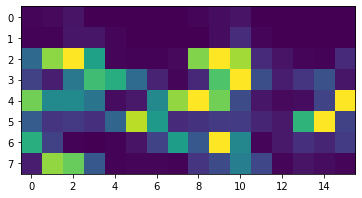

In [61]:
# display one feature
plt.imshow(descriptors_sift[0][0].reshape(8,-1))
plt.show()

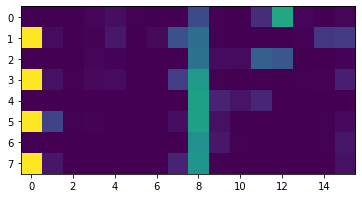

In [68]:
# display one feature
plt.imshow(descriptors_sift[0][130].reshape(8,-1))
plt.show()

# Création des bag-of-features

In [12]:
%%time
n_features_max, descriptors = combine_descriptors(descriptors_sift)
print(f"Maximum number of features among the images is: {n_features_max}\n")

Maximum number of features among the images is: 509

CPU times: user 1.33 s, sys: 1.86 s, total: 3.19 s
Wall time: 3.19 s


## Reduction de Dimension

Original number of features:                   65152
No. of features after dimensionality reduction: 566
Features reduced by:                            99.13%



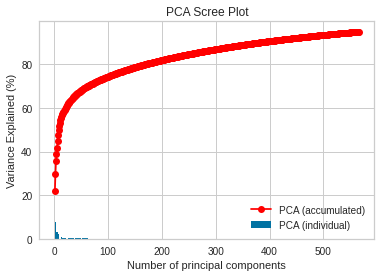

CPU times: user 2min 1s, sys: 25.5 s, total: 2min 26s
Wall time: 25.9 s


In [15]:
%%time
descriptors_pca = hp.reduce_dim(scaler="StandardScaler", data=descriptors, scree=True)

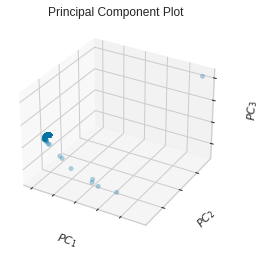

In [18]:
# instantiate PCA from yellowbrick
visualizer_3d_ = yb_PCA(projection=3, alpha=0.3)
# fit and transform word2vec_
visualizer_3d_.fit_transform(descriptors)
# show visualization
visualizer_3d_.show()
plt.show()

In [32]:
# backup word2vec_pca
np.save('data/pca_descriptors.npy', descriptors_pca)

#  Classification Non Supervisée - KMeans

In [20]:
# descriptors_pca = np.load('data/pca_descriptors.npy')
# descriptors_pca.shape

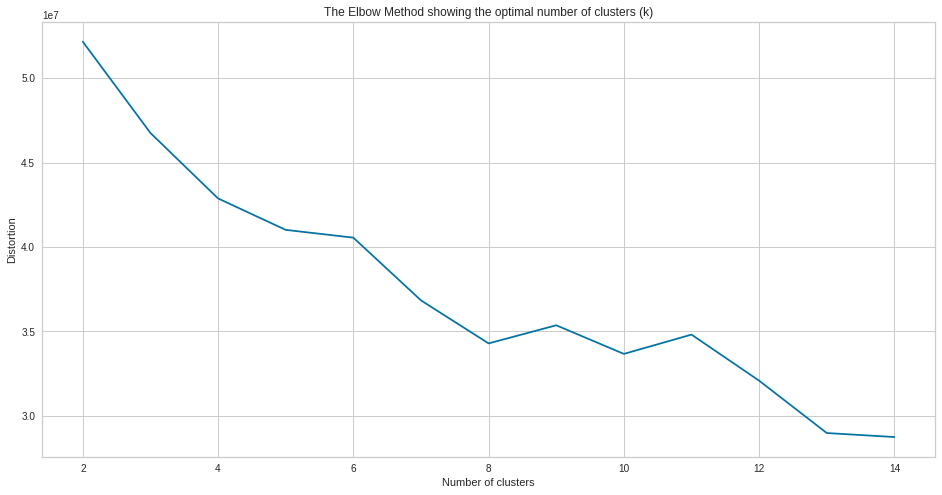

CPU times: user 55.2 s, sys: 40.1 s, total: 1min 35s
Wall time: 14.9 s


In [21]:
%%time
kmeans = hp.find_cluster_numbers(2, 15, descriptors_pca, random_state=1301)

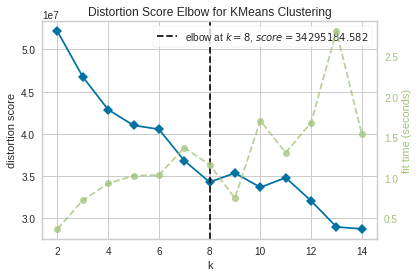

CPU times: user 1min 3s, sys: 44.7 s, total: 1min 47s
Wall time: 17.1 s


In [5]:
%%time
hp.plot_elbow_visualizer(2, 15, descriptors_pca, random_state=1301)

**Remarque**<br>
Le meilleur nombre de clusters est 8.

# Visualisation de Clusters

In [6]:
%%time
# generate TSNE embedded space in 2 dimensions
df_tsne = hp.generate_TSNE_dimensions(descriptors_pca)
# add kmeans cluters in the df
df_tsne["clusters_7"] = kmeans[7]
df_tsne["clusters_8"] = kmeans[8]

CPU times: user 1min 12s, sys: 0 ns, total: 1min 12s
Wall time: 10.5 s


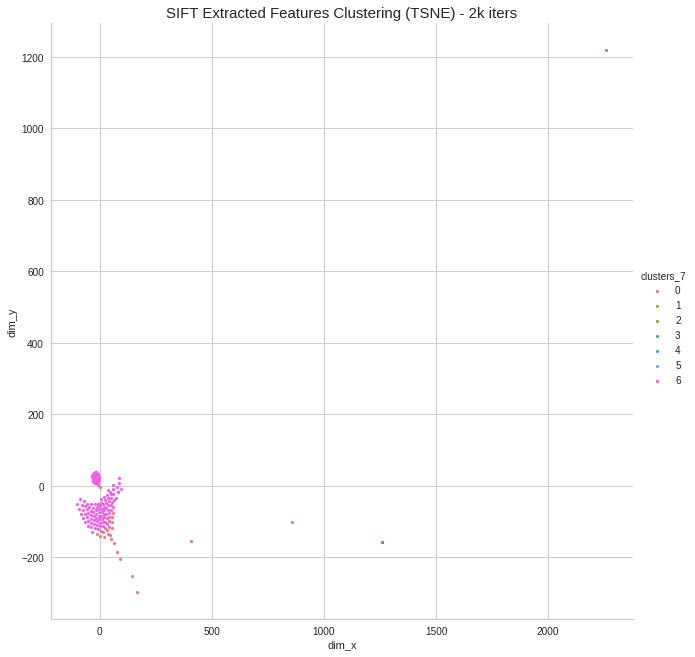

In [23]:
# plot the 7 clusters of the image features extracted by VGG16 model
hp.plot_clusters(
    x="dim_x",
    y="dim_y",
    data=df_tsne,
    hue="clusters_7",
    title="SIFT Extracted Features Clustering (TSNE) - 2k iters",
    alpha=1,
)

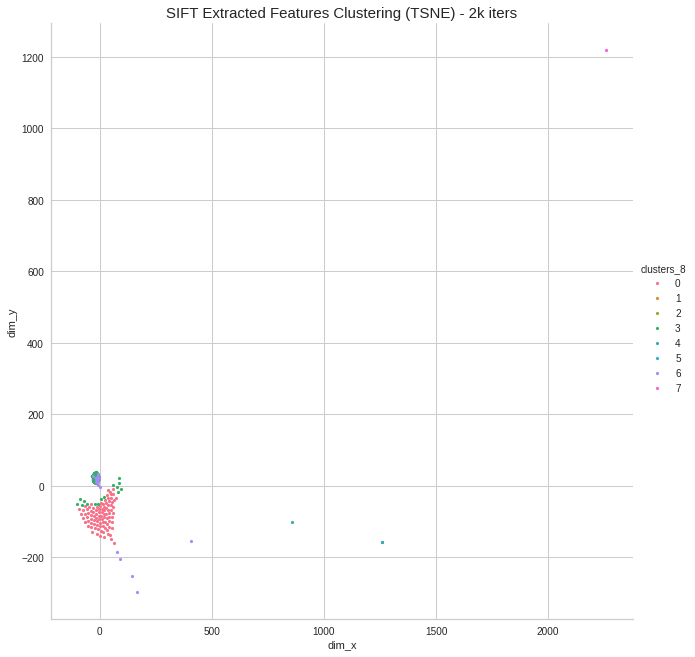

In [24]:
# plot the 8 clusters of the image features extracted by VGG16 model
hp.plot_clusters(
    x="dim_x",
    y="dim_y",
    data=df_tsne,
    hue="clusters_8",
    title="SIFT Extracted Features Clustering (TSNE) - 2k iters",
    alpha=1,
)

# Comparer le Résultat Clustering de SIFT avec les Catégories Produits

In [7]:
# extract top categories in the product category tree
df['cat'] = [cat.split(" >> ")[0].replace('["', "") for cat in df.product_category_tree]
df.drop(columns='product_category_tree', inplace=True)

In [70]:
df.to_csv("data/df_cat.csv", index=False)

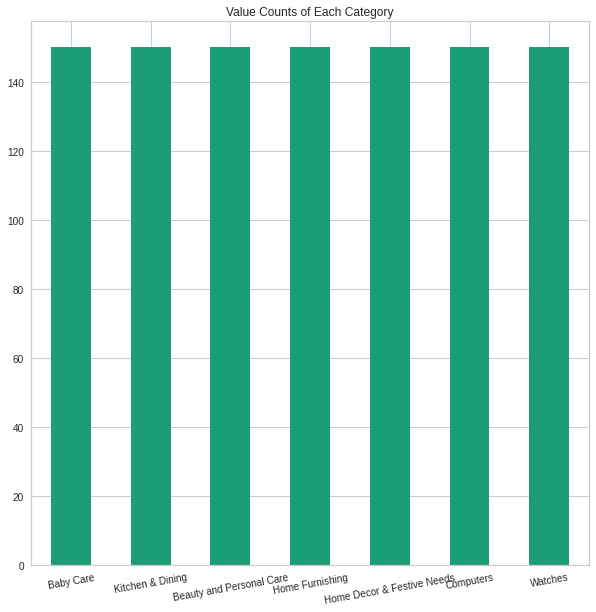

In [30]:
df.cat.value_counts().plot(kind="bar", figsize=(10, 10), rot=10, colormap="Dark2")
plt.title("Value Counts of Each Category")
plt.show()

In [18]:
df.groupby(['cat']).count()#plot(kind="bar")
# plt.show()

uniq_id  crawl_timestamp  product_url  \
cat                                                                 
Baby Care                       150              150          150   
Beauty and Personal Care        150              150          150   
Computers                       150              150          150   
Home Decor & Festive Needs      150              150          150   
Home Furnishing                 150              150          150   
Kitchen & Dining                150              150          150   
Watches                         150              150          150   

                            product_name  pid  retail_price  discounted_price  \
cat                                                                             
Baby Care                            150  150           149               149   
Beauty and Personal Care             150  150           150               150   
Computers                            150  150           150               150   
Home Decor & Festive Needs           150  150           150               150   
Home Furnishing                      150  150           150               150   
Kitchen & Dining                     150  150           150               150   
Watches                              150  150           150               150   

                            image  is_FK_Advantage_product  description  \
cat                                                                       
Baby Care                     150                      150          150   
Beauty and Personal Care      150                      150          150   
Computers                     150                      150          150   
Home Decor & Festive Needs    150                      150          150   
Home Furnishing               150                      150          150   
Kitchen & Dining              150                      150          150   
Watches                       150                      150          150   

                            product_rating  overall_rating  brand  \
cat                                                                 
Baby Care                              150             150    134   
Beauty and Personal Care               150             150     41   
Computers                              150             150    150   
Home Decor & Festive Needs             150             150    148   
Home Furnishing                        150             150    150   
Kitchen & Dining                       150             150     79   
Watches                                150             150     10   

                            product_specifications  
cat                                                 
Baby Care                                      150  
Beauty and Personal Care                       150  
Computers                                      150  
Home Decor & Festive Needs                     149  
Home Furnishing                                150  
Kitchen & Dining                               150  
Watches                                        150

In [71]:
# combine clusters assignment with df_cat
df_clusters = df['cat'].copy().to_frame()
df_clusters['clusters_7'] = kmeans[7]
df_clusters['clusters_8'] = kmeans[8]
df_clusters.sample(5)

cat  clusters_7  clusters_8
44             Kitchen & Dining           6           3
65             Kitchen & Dining           6           3
888             Home Furnishing           6           3
234            Kitchen & Dining           6           3
695  Home Decor & Festive Needs           6           3

In [72]:
# check number of counts of each category in cat_1
df_clusters["cat"].value_counts()

Baby Care                     150
Watches                       150
Kitchen & Dining              150
Home Furnishing               150
Computers                     150
Beauty and Personal Care      150
Home Decor & Festive Needs    150
Name: cat, dtype: int64

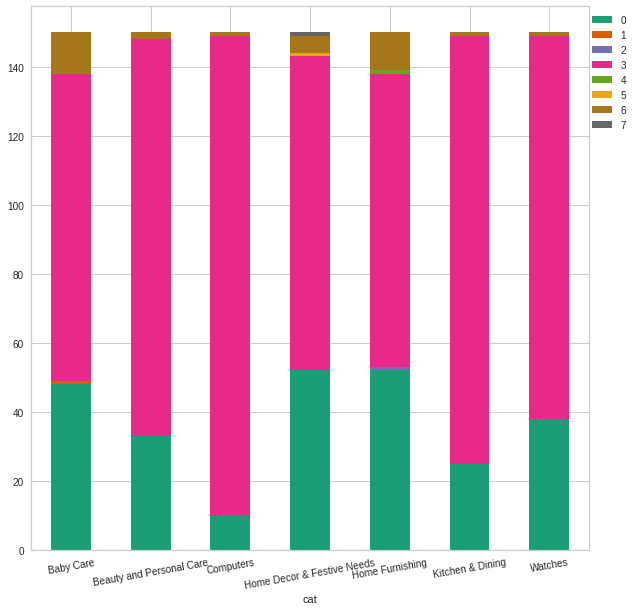

In [73]:
# group clusters_8 by cat
hp.plot_stacked_barchart(df_clusters, "cat", "clusters_8")

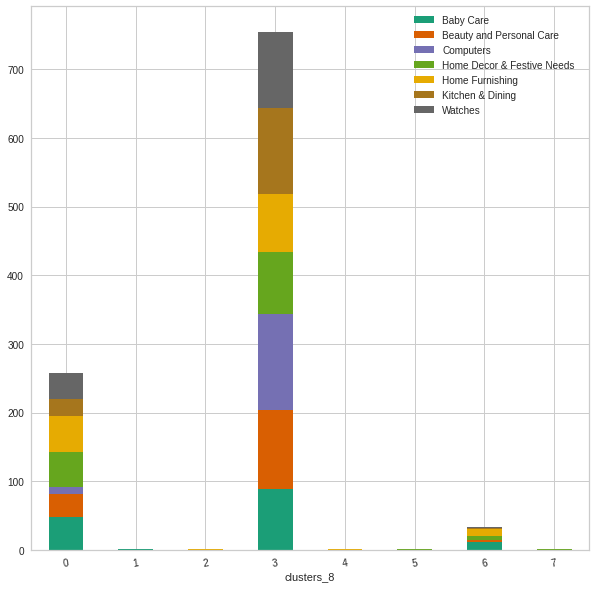

In [74]:
# group cat by clusters_8
hp.plot_stacked_barchart(df_clusters, "clusters_8", "cat")

**Remarque**<br>
On contate que l'assignement des clusters n'est pas homogène.
Chaque catégorie est composée les mêmes 3 clusters en majorité alors que les clusters 1, 2, 4, 5 & 7 sont très petits par rapport aux clusters 0, 3 & 6.

# Annexe

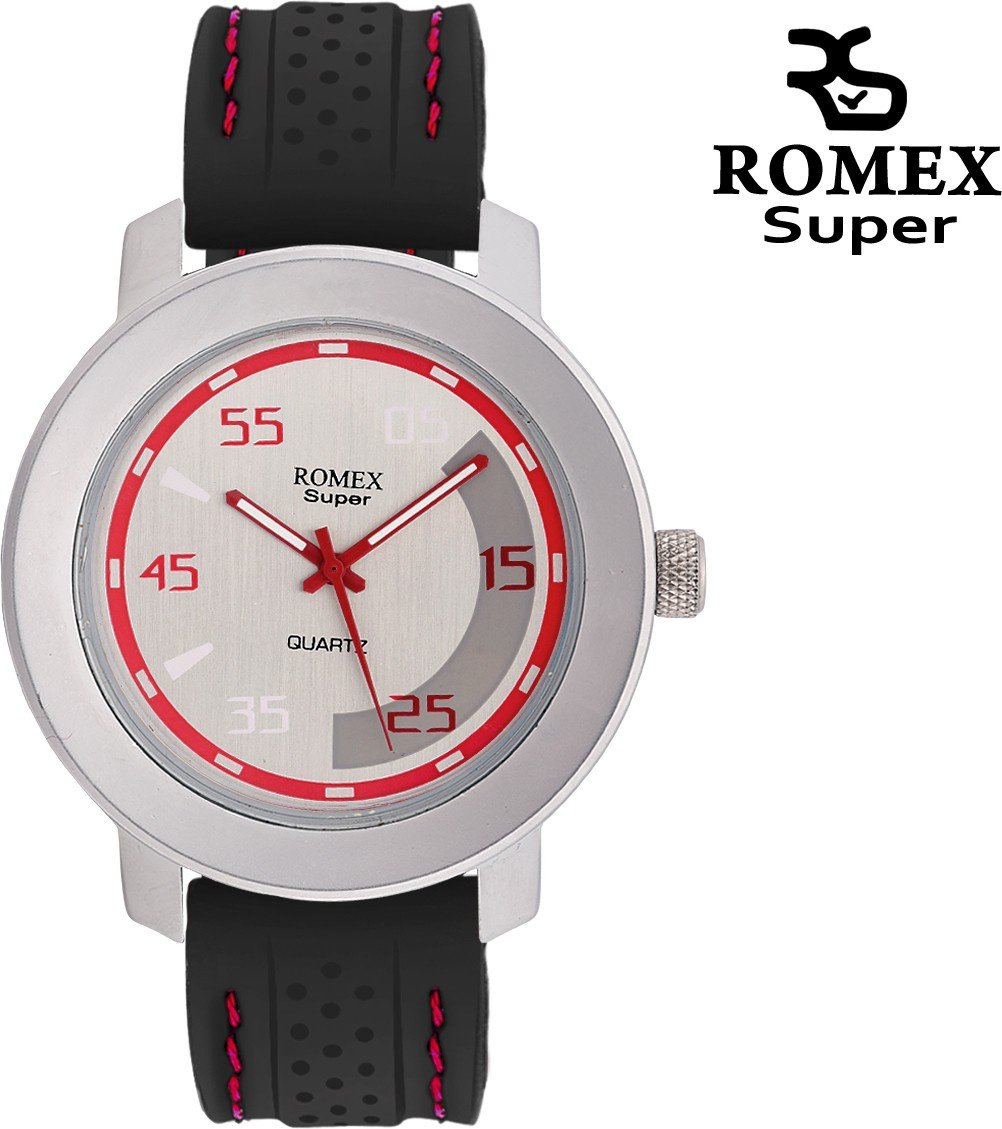

In [31]:
from IPython.display import Image
Image(join(root, df.image[652]), width=100)

In [33]:
def generate_random_idx(range_end:int=1048)->int:
    return randint(0, range_end)

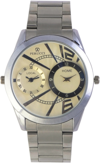

In [39]:
idx = generate_random_idx()
reduce_by_ratio(Image.open(join(root, df.image[idx])))

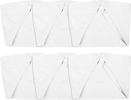

In [34]:
idx = randint(0,1048)
reduce_by_ratio(Image.open(join(root, df.image[idx])))

In [ ]:
import matplotlib.image as mpimg

CPU times: user 1.55 s, sys: 28 ms, total: 1.58 s
Wall time: 1.64 s


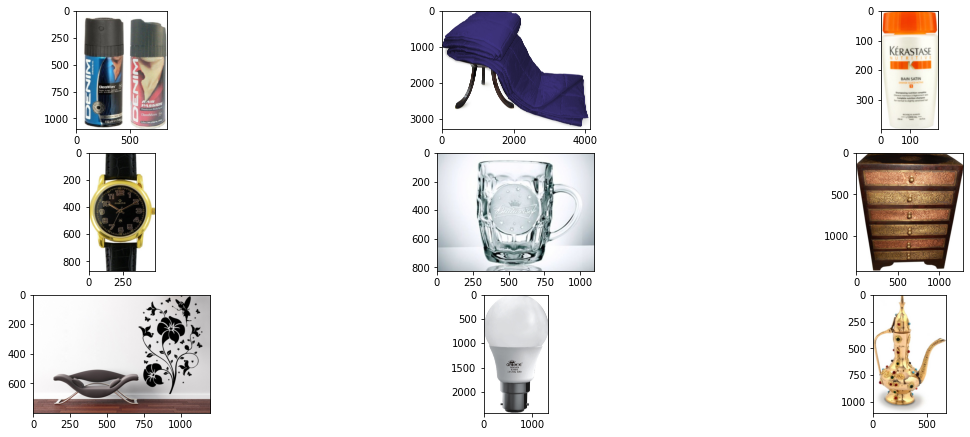

In [35]:
%%time
plt.figure(figsize=(20,10))
col = 3
indices = sample(range(0,1048), 9)
for idx, img_idx in enumerate(indices):
    plt.subplot(int(len(indices)/col)+1, col, idx+1)
    path = join(root, df.image[img_idx])
    plt.imshow(mpimg.imread(path))

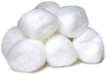

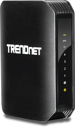

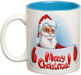

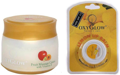

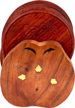

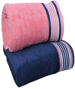

In [36]:
min_pixel = 75
indices = sample(range(0,1048), 6)
for img_idx in indices:
    path = join(root, df.image[img_idx])
    img = Image.open(path)
    w, h = img.size
    if w <= h:
        h = int(h / w * min_pixel)
        w = min_pixel
    else:
        w = int(w / h * min_pixel)
        h = min_pixel
    img = img.resize((w, h))
    img.show()